In [1]:
# !python -m pip install tables pyarrow --upgrade
# !pip install polars

In [2]:
import pandas as pd
import os
import numpy as np
import pyarrow
import torch
from plotter import Plotter
import matplotlib.pyplot as plt
import numpy.linalg as la

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [3]:
from table import Table
from blackbox import BlackBox

In [4]:
np.random.seed(23)
torch.manual_seed(23+10)

In [5]:

if __name__ == "__main__":
    # address = "raw_points/wood/rs-70_pcds/1717020290-942984619/3/wood_rs-70_pcds_1717020290-942984619_172_1.npz"
    

    address = os.path.join('C:\\', 'GitHub', 'ransac_tomato', 'Archive2', 'raw_points', 'synthetic', 'normal_noise', '0_0.2100.npz')
    # address = 'C:/GitHub/ransac_tomato/Archive2/raw_points/synthetic/normal_noise/0_0.2100.npz'

    # volume, semiaxis, confine
    scale_corrections = {
    "polygon": (1e-6, 1, 100),
    "wood": (1e-6, 1., 100.),
    "synthetic": (1, 1., 1.)
    }

    main_variables = {
        "sphere_resolution": 5000,
        "n_iterations": 10000
    }

    hyperparameters = {
        "threshold": 0.1,
        "confine_coeff": 5,
        "h": 3,
        "method": "count",
    }




In [6]:
blackbox = BlackBox(address = address, main_variables=main_variables, scale_correction= scale_corrections["synthetic"])
blackbox.fit()

df = Table(blackbox=blackbox, hyperparameters=hyperparameters, main_variables=main_variables, debug=True).prepare()


import polars as pl
# df = df.dropna()
df = df.filter(pl.col("rejected") == 0)
df.head(20)

res_new torch.Size([10000, 5000, 1]) torch.float32
distances torch.Size([10000, 5000, 1]) torch.float32
tensor([[[-4.3749],
         [ 2.3962],
         [-3.4297],
         ...,
         [-5.5704],
         [-0.7805],
         [-1.0807]],

        [[-1.5041],
         [ 1.2601],
         [-0.6023],
         ...,
         [-1.6097],
         [-1.6698],
         [ 0.0852]],

        [[ 1.3300],
         [ 0.9229],
         [ 2.1453],
         ...,
         [ 1.5599],
         [-1.3820],
         [ 2.6412]],

        ...,

        [[-0.0327],
         [ 0.3765],
         [-0.1831],
         ...,
         [ 0.0645],
         [-0.4844],
         [-0.1482]],

        [[ 0.1977],
         [-1.8959],
         [-0.4535],
         ...,
         [ 0.2241],
         [-0.9557],
         [-0.9709]],

        [[-0.2054],
         [ 0.4519],
         [ 0.2691],
         ...,
         [ 0.0332],
         [-0.6739],
         [ 0.1817]]])
mask torch.Size([10000, 5000]) torch.bool
intersect torch.Size([10

shape: (20, 50)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬──────────┬───────────┬───────────┐
│ hyp_a     ┆ hyp_b     ┆ hyp_c     ┆ hyp_d     ┆ … ┆ water_vol ┆ rejected ┆ inlier_va ┆ ransac_it │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ume       ┆ ---      ┆ lue       ┆ eration   │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ ---       ┆ u8       ┆ ---       ┆ ---       │
│           ┆           ┆           ┆           ┆   ┆ f64       ┆          ┆ f64       ┆ u16       │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪══════════╪═══════════╪═══════════╡
│ 0.948765  ┆ 0.483989  ┆ 0.834533  ┆ -0.301619 ┆ … ┆ 0.0       ┆ 0        ┆ 246.0     ┆ 5         │
│ -3.851122 ┆ -2.800415 ┆ -2.981551 ┆ 2.081122  ┆ … ┆ 0.0       ┆ 0        ┆ 79.0      ┆ 9         │
│ 1.248304  ┆ 0.602719  ┆ 0.513346  ┆ -0.505587 ┆ … ┆ 0.0       ┆ 0        ┆ 316.0     ┆ 10        │
│ 0.318922  ┆ 0.105739  ┆ 0.098232  ┆ -0.054631 ┆ … ┆ 0.0       ┆ 0        ┆ 792.0     ┆ 29        │
│ 0.819543  ┆ 0.565798  ┆ 0.588367  ┆ -0.334617 ┆ … ┆ 0.0       ┆ 0        ┆ 284.0     ┆ 37        │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …        ┆ …         ┆ …         │
│ 0.761833  ┆ 0.765495  ┆ 0.601679  ┆ -0.538197 ┆ … ┆ 0.0       ┆ 0        ┆ 191.0     ┆ 77        │
│ 0.339068  ┆ 0.319946  ┆ 0.342519  ┆ -0.08488  ┆ … ┆ 0.0       ┆ 0        ┆ 478.0     ┆ 80        │
│ -1.419794 ┆ -0.944043 ┆ -0.686821 ┆ 0.720323  ┆ … ┆ 0.0       ┆ 0        ┆ 285.0     ┆ 92        │
│ 0.322505  ┆ 0.286008  ┆ 0.342385  ┆ -0.065432 ┆ … ┆ 0.0       ┆ 0        ┆ 603.0     ┆ 105       │
│ 0.047342  ┆ 0.096232  ┆ 0.187204  ┆ -0.001379 ┆ … ┆ 0.0       ┆ 0        ┆ 630.0     ┆ 113       │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴──────────┴───────────┴───────────┘

In [7]:
df.describe()

shape: (9, 51)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬──────────┬───────────┬───────────┐
│ statistic ┆ hyp_a     ┆ hyp_b     ┆ hyp_c     ┆ … ┆ water_vol ┆ rejected ┆ inlier_va ┆ ransac_it │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ume       ┆ ---      ┆ lue       ┆ eration   │
│ str       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ ---       ┆ f64      ┆ ---       ┆ ---       │
│           ┆           ┆           ┆           ┆   ┆ f64       ┆          ┆ f64       ┆ f64       │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪══════════╪═══════════╪═══════════╡
│ count     ┆ 1794.0    ┆ 1794.0    ┆ 1794.0    ┆ … ┆ 1794.0    ┆ 1794.0   ┆ 1794.0    ┆ 1794.0    │
│ null_coun ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0      ┆ 0.0       ┆ 0.0       │
│ t         ┆           ┆           ┆           ┆   ┆           ┆          ┆           ┆           │
│ mean      ┆ 1.164672  ┆ 0.59079   ┆ 0.72902   ┆ … ┆ 0.0       ┆ 0.0      ┆ 222.20401 ┆ 4975.6075 │
│           ┆           ┆           ┆           ┆   ┆           ┆          ┆ 3         ┆ 81        │
│ std       ┆ 18.800661 ┆ 10.719008 ┆ 15.456765 ┆ … ┆ 0.0       ┆ 0.0      ┆ 159.93514 ┆ 2864.7706 │
│           ┆           ┆           ┆           ┆   ┆           ┆          ┆           ┆ 53        │
│ min       ┆ -140.3105 ┆ -94.64437 ┆ -242.3034 ┆ … ┆ 0.0       ┆ 0.0      ┆ 9.0       ┆ 5.0       │
│           ┆ 93        ┆ 9         ┆ 21        ┆   ┆           ┆          ┆           ┆           │
│ 25%       ┆ -0.46058  ┆ -0.295399 ┆ -0.369358 ┆ … ┆ 0.0       ┆ 0.0      ┆ 96.0      ┆ 2540.0    │
│ 50%       ┆ 0.692677  ┆ 0.462058  ┆ 0.503032  ┆ … ┆ 0.0       ┆ 0.0      ┆ 194.0     ┆ 4943.0    │
│ 75%       ┆ 1.640163  ┆ 1.017125  ┆ 1.135323  ┆ … ┆ 0.0       ┆ 0.0      ┆ 313.0     ┆ 7450.0    │
│ max       ┆ 642.92932 ┆ 370.05297 ┆ 469.85369 ┆ … ┆ 0.0       ┆ 0.0      ┆ 1059.0    ┆ 9987.0    │
│           ┆ 1         ┆ 9         ┆ 9         ┆   ┆           ┆          ┆           ┆           │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴──────────┴───────────┴───────────┘

In [8]:
# 26 = 0-9 equation coefs
# 10-12 - center
# 13-15 - radii
# 16-24 - rotation
# 25 - rejection (>0 for rejected, 0 for accepted)
blackbox.get_predictions()[0]

tensor([ 1.5970e+00,  2.1571e-01,  2.9857e+00, -1.3718e+00, -8.3916e-01,
         1.1675e-01, -6.8004e+00,  2.6048e-01,  8.1158e+00,  1.0000e+00,
        -3.4221e-01, -2.0355e+00, -1.3757e+00,  1.0000e-10,  1.7264e+00,
         1.2646e+00, -5.4273e-01,  6.5886e-01, -5.2092e-01, -8.3416e-01,
        -4.9528e-01,  2.4265e-01, -9.8129e-02,  5.6622e-01,  8.1839e-01,
         1.0000e+00])

In [9]:
# accepted
np.where(blackbox.get_predictions()[:, -1] == 0)

(array([   4,    8,    9, ..., 9970, 9979, 9986], dtype=int64),)

In [10]:
best_ind = np.argmax(df['iou'])
best_ind

402

In [11]:
df.to_pandas().iloc[best_ind]['iou']

0.8883295059204102

In [12]:
# True
T = blackbox.tomato.center
S = np.diag(blackbox.tomato.semiaxis)
R = blackbox.tomato.rotation

In [13]:
# 26 = 0-9 equation coefs
# 10-12 - center
# 13-15 - radii
# 16-24 - rotation
# 25 - rejection (>0 for rejected, 0 for accepted)

index = -1 + best_ind
prediction = blackbox.get_predictions()[index]

T_pred = np.array(prediction[10:13])
S_pred = np.diag(prediction[13:16])
R_pred = np.array(prediction[16:25].reshape((3, 3)))

In [14]:
hypothesis = blackbox.get_predictions()[index][:10]
hypothesis

tensor([-1.6582, -1.1023, -1.0976,  0.7145,  0.6106, -0.0238,  5.1068, -3.0857,
        -3.8465,  1.0000])

In [15]:


plotter = Plotter()
plotter.plot_ellipsoid(S, R.T, T, name='True', alpha=0.6)
plotter.plot_ellipsoid(S_pred, R_pred.T, T_pred, name='predicted', alpha=0.5)

plotter.plot_points(blackbox.tomato.points.T, alpha=0.7, size=0.5, name='true')

plotter.show()

In [16]:
df.to_pandas().iloc[best_ind]['iou']

0.8883295059204102

In [17]:
df.to_pandas().describe()

hyp_a        hyp_b        hyp_c        hyp_d        hyp_e  \
count  1794.000000  1794.000000  1794.000000  1794.000000  1794.000000   
mean      1.164672     0.590790     0.729020    -0.353901    -0.253085   
std      18.800661    10.719008    15.456765     6.633200     5.370527   
min    -140.310593   -94.644379  -242.303421  -241.695328  -144.874588   
25%      -0.458145    -0.294696    -0.367866    -0.528804    -0.437385   
50%       0.691822     0.461935     0.502947    -0.180029    -0.113019   
75%       1.638709     1.016252     1.134890     0.131858     0.163254   
max     642.929321   370.052979   469.853699    56.917336    86.320549   

             hyp_f        hyp_g        hyp_h        hyp_i   hyp_j  tomato_id  \
count  1794.000000  1794.000000  1794.000000  1794.000000  1794.0     1794.0   
mean      0.012884    -2.354231     1.289985     1.992881     1.0        0.0   
std       2.053783    39.426336    28.163133    45.656963     0.0        0.0   
min     -20.572308 -1140.877441  -235.221848  -658.193787     1.0        0.0   
25%      -0.186792    -3.512709    -0.826398    -1.339255     1.0        0.0   
50%      -0.064237    -1.207364     0.840312     1.090486     1.0        0.0   
75%       0.055446     1.170488     2.321379     3.067710     1.0        0.0   
max      43.879147   325.157684   957.539856  1455.243652     1.0        0.0   

       confine_coeff            K       h     threshold  sphere_resolution  \
count         1794.0  1794.000000  1794.0  1.794000e+03             1794.0   
mean             5.0     6.231286     3.0  1.000000e-01             5000.0   
std              0.0     0.000000     0.0  1.388166e-17                0.0   
min              5.0     6.231286     3.0  1.000000e-01             5000.0   
25%              5.0     6.231286     3.0  1.000000e-01             5000.0   
50%              5.0     6.231286     3.0  1.000000e-01             5000.0   
75%              5.0     6.231286     3.0  1.000000e-01             5000.0   
max              5.0     6.231286     3.0  1.000000e-01             5000.0   

               iou  intersect_volume  intersect_point_count  pred_volume  \
count  1794.000000       1794.000000            1794.000000  1794.000000   
mean      0.441745         25.571995            3371.376254    53.465503   
std       0.239045         11.616926            1433.564332    40.976720   
min       0.014059          1.141482             146.000000    11.733508   
25%       0.190241         12.340480            2064.250000    38.169015   
50%       0.500049         31.101471            4043.000000    45.233421   
75%       0.649204         34.721378            4441.750000    55.477674   
max       0.888330         38.974571            4985.000000  1027.369507   

            pred_x       pred_y       pred_z       pred_a       pred_b  \
count  1794.000000  1794.000000  1794.000000  1794.000000  1794.000000   
mean      0.426707    -1.001265    -1.209336     2.968047     2.272186   
std       0.556411     0.541385     0.564208     1.156130     0.417012   
min      -4.011053    -5.590958    -7.843096     0.800725     1.340513   
25%       0.217101    -1.227210    -1.415131     1.722733     2.015727   
50%       0.409841    -1.006619    -1.217965     3.192929     2.216696   
75%       0.624560    -0.779079    -0.991139     3.638158     2.448475   
max       6.241482     3.797705     3.672547    10.290144     6.857429   

            pred_c   pred_rot_x   pred_rot_y   pred_rot_z   pred_rot_w  \
count  1794.000000  1794.000000  1794.000000  1794.000000  1794.000000   
mean      2.043603     0.377824     0.151895     0.169394     0.212760   
std       0.867989     0.481986     0.374096     0.464638     0.415322   
min       0.934994    -0.645373    -0.685004    -0.661109    -0.680701   
25%       1.449521    -0.047196    -0.112064    -0.194471    -0.010099   
50%       1.634622     0.321991     0.161713    -0.009303     0.178022   
75%       2.721288     0.865894     0.392455     0.6

In [18]:
from ellipsoid import ELLIPSOID
import torch

synth_ellip = ELLIPSOID(
                                params = [T, np.diag(S), R], 
                                points = None, 
                                fill = True, 
                                resolution=10**4,
                                dev=torch.device('cpu')
                            )

from ellipsoid import ELLIPSOID
import torch

synth_ellip_pred = ELLIPSOID(
                                params = [T_pred, np.diag(S_pred), R_pred], 
                                points = None, 
                                fill = True, 
                                resolution=10**4,
                                dev=torch.device('cpu')
                            )


In [19]:
plotter = Plotter()

plotter.plot_ellipsoid(S_pred, R_pred.T, T_pred, name='predicted', alpha=0.5)
plotter.plot_points(synth_ellip_pred.points.T, alpha=0.3, size=0.5)
plotter.plot_ellipsoid(S, R.T, T, name='True', alpha=0.6)
plotter.plot_points(synth_ellip.points.T, alpha=0.7, size=0.5)

plotter.show()

In [20]:
plotter = Plotter()
plotter.plot_ellipsoid(S, R.T, T, name='True', alpha=0.6)
plotter.plot_points(synth_ellip.points.T, alpha=0.7, size=0.5, name='synthetics')


plotter.show()

In [21]:
R_pred @ R_pred.T

array([[ 9.9999988e-01,  2.9802322e-08,  5.9604645e-08],
       [ 2.9802322e-08,  1.0000000e+00, -5.9604645e-08],
       [ 5.9604645e-08, -5.9604645e-08,  1.0000000e+00]], dtype=float32)

In [22]:
from plotter import Plotter

plotter = Plotter()

plotter.plot_ellipsoid(S_pred, R_pred.T, T_pred, name='predicted', alpha=0.5)
plotter.plot_points(synth_ellip_pred.points.T, alpha=0.3, size=0.5, name='synth')

plotter.show()

In [23]:
true_sur_points = plotter.gen_ellipse_points(S, R.T, T).reshape((3, -1)).T
true_sur_points

array([[-1.33338491, -3.20460633, -2.59743751],
       [-1.33338491, -3.20460633, -2.59743751],
       [-1.33338491, -3.20460633, -2.59743751],
       ...,
       [ 2.13338491,  1.20460633,  0.19743751],
       [ 2.13338491,  1.20460633,  0.19743751],
       [ 2.13338491,  1.20460633,  0.19743751]])

In [24]:
plotter = Plotter()
plotter.plot_ellipsoid(S, R.T, T, name='True', alpha=0.6)
# plotter.plot_ellipsoid(S_pred, R_pred.T, T_pred, name='predicted', alpha=0.5)

plotter.plot_points(true_sur_points.T, alpha=0.7, size=0.5)

plotter.show()

In [25]:
def subs_point(point, hypothesis):
    x, y, z = point
    pt = np.array([x**2, y**2, z**2, 2*x*y, 2*x*z, 2*y*z, x, y, z, -1])

    return pt @ np.array(hypothesis)

def subs_points(points, hypothesis):
    results = np.zeros(len(points))
    for i, point in enumerate(points):
        results[i] = subs_point(point, hypothesis)

    return results

In [26]:
def M_m(R, S, T):

    M = R.T @ la.inv(S)**2 @ R
    m = (-2) * T @ R.T @ la.inv(S)**2 @ R
    m_ = 1 - T @ R.T @ la.inv(S)**2 @ R @ T

    M /= m_
    m /= m_

    return M, m

def calc_hyp(R, S, T):
    M, m = M_m(R.T, S, T)

    return np.array([M[0, 0], M[1, 1], M[2, 2], M[0, 1], M[0, 2], M[1, 2], *m, 1])



In [27]:
true_hyp = calc_hyp(R, S, T)
true_hyp

array([ 2.29314475e+00,  1.30083861e+00,  1.52737750e+00, -8.46991402e-01,
       -7.20093241e-01,  7.57062107e-04, -5.25672238e+00,  3.28108729e+00,
        4.24329473e+00,  1.00000000e+00])

(array([  4.,  39., 104., 348., 524., 736., 449., 276.,  86.,  26.]),
 array([-7.10542736e-15, -5.75095527e-15, -4.39648318e-15, -3.04201109e-15,
        -1.68753900e-15, -3.33066907e-16,  1.02140518e-15,  2.37587727e-15,
         3.73034936e-15,  5.08482145e-15,  6.43929354e-15]),
 <BarContainer object of 10 artists>)

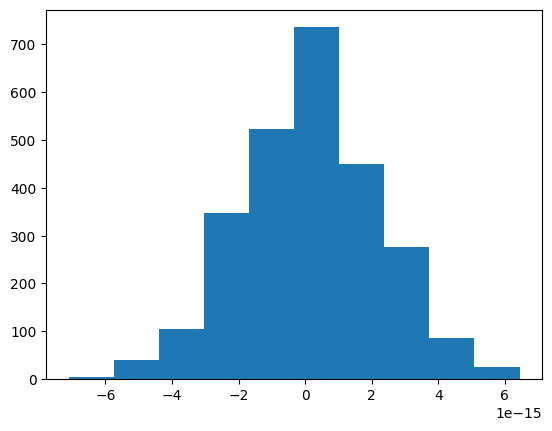

In [28]:
buf = subs_points(true_sur_points, true_hyp)

plt.hist(buf)

(array([ 314.,  582.,  733.,  897.,  987., 1105., 1202., 1272., 1403.,
        1505.]),
 array([-6.23529194e+00, -5.61179232e+00, -4.98829271e+00, -4.36479309e+00,
        -3.74129348e+00, -3.11779386e+00, -2.49429425e+00, -1.87079464e+00,
        -1.24729502e+00, -6.23795409e-01, -2.95794633e-04]),
 <BarContainer object of 10 artists>)

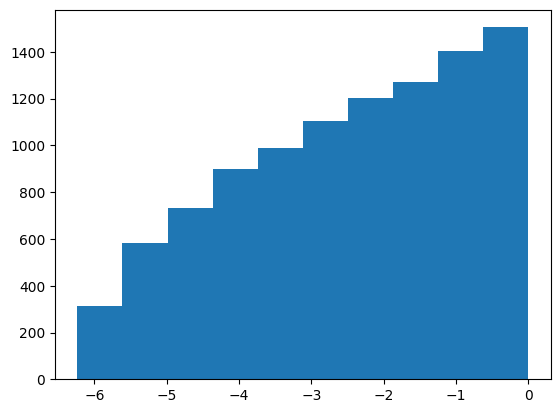

In [29]:
buf = subs_points(synth_ellip.points, true_hyp)

plt.hist(buf)

(array([ 311.,  572.,  770.,  881., 1043., 1115., 1262., 1299., 1377.,
        1370.]),
 array([-4.71981808e+00, -4.24787464e+00, -3.77593119e+00, -3.30398775e+00,
        -2.83204430e+00, -2.36010086e+00, -1.88815741e+00, -1.41621397e+00,
        -9.44270524e-01, -4.72327079e-01, -3.83634559e-04]),
 <BarContainer object of 10 artists>)

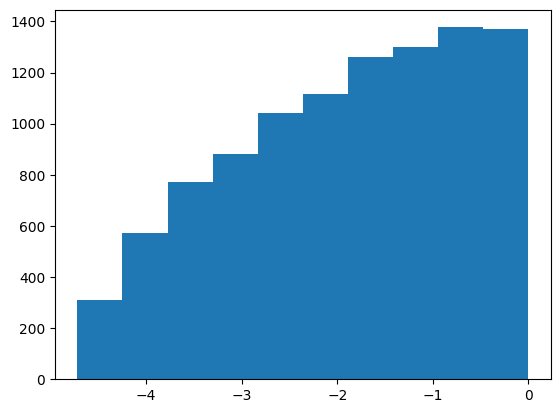

In [47]:
buf = subs_points(synth_ellip_pred.points, -hypothesis)

plt.hist(buf)

(array([ 311.,  572.,  770.,  881., 1043., 1115., 1262., 1299., 1377.,
        1370.]),
 array([-4.71981808e+00, -4.24787464e+00, -3.77593119e+00, -3.30398775e+00,
        -2.83204430e+00, -2.36010086e+00, -1.88815741e+00, -1.41621397e+00,
        -9.44270524e-01, -4.72327079e-01, -3.83634559e-04]),
 <BarContainer object of 10 artists>)

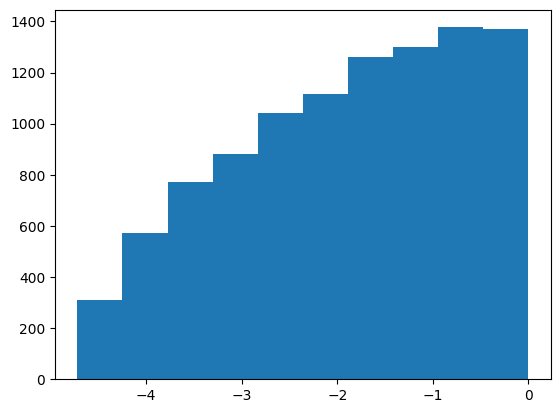

In [49]:
buf = subs_points(synth_ellip_pred.points, -hypothesis)

plt.hist(buf)

In [32]:
# A U B = A + B - A^B

In [33]:
# A^B / A U B

In [34]:
def count_in(points, hypothesis):
    buf = subs_points(points, hypothesis)

    return np.sum(buf < 0) / len(buf)

In [50]:
A = synth_ellip.points
B = synth_ellip_pred.points

A_hyp = true_hyp
B_hyp = hypothesis

In [52]:
count_in(B, -B_hyp)

1.0

In [53]:
count_in(A, A_hyp)

1.0

In [56]:
count_in(A, -B_hyp)

0.8812

In [55]:
count_in(B, A_hyp)

0.8205

In [40]:
calc_hyp(R_pred, S_pred, T_pred)

array([-1.6582427 , -1.10227311, -1.09761584,  0.71451801,  0.61057663,
       -0.02379376,  5.10675192, -3.08573437, -3.84648514,  1.        ])

In [41]:
np.array(hypothesis)

array([-1.6582452 , -1.1022745 , -1.0976175 ,  0.71451896,  0.6105776 ,
       -0.02379373,  5.1067576 , -3.085738  , -3.84649   ,  1.        ],
      dtype=float32)

In [42]:
count_in(B, hypothesis)

0.0

In [43]:
count_in(A, A_hyp)

1.0

In [44]:
calc_hyp(R_pred, S_pred, T_pred)

array([-1.6582427 , -1.10227311, -1.09761584,  0.71451801,  0.61057663,
       -0.02379376,  5.10675192, -3.08573437, -3.84648514,  1.        ])

(array([1370., 1377., 1299., 1262., 1115., 1043.,  881.,  770.,  572.,
         311.]),
 array([3.83634559e-04, 4.72327079e-01, 9.44270524e-01, 1.41621397e+00,
        1.88815741e+00, 2.36010086e+00, 2.83204430e+00, 3.30398775e+00,
        3.77593119e+00, 4.24787464e+00, 4.71981808e+00]),
 <BarContainer object of 10 artists>)

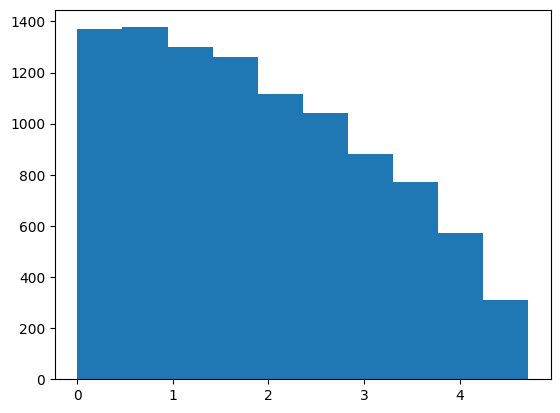

In [45]:
buf = subs_points(synth_ellip_pred.points, hypothesis)

plt.hist(buf)

(array([ 7., 11., 20., 22., 16., 30., 39., 22., 23., 24., 31., 28., 31.,
        22., 32., 20., 17., 18., 16., 17., 10., 16., 11., 17., 13.,  8.,
         7.,  8.,  7.,  5., 10., 12.,  9.,  7.,  5.,  3.,  6., 10., 14.,
         9., 17., 13., 12., 13., 16., 16., 13., 19., 20., 20., 17., 17.,
        20., 14., 23., 24., 15., 27., 22., 32., 24., 26., 24., 12., 32.,
        29., 35., 25., 35., 28., 30., 27., 25., 48., 23., 36., 26., 38.,
        26., 28., 33., 26., 32., 25., 17.,  8., 12., 14., 12.,  8.,  8.,
         7.,  3.,  2.,  1.,  1.,  1.,  2.,  1.,  1.]),
 array([0.01405942, 0.02280212, 0.03154482, 0.04028752, 0.04903022,
        0.05777292, 0.06651562, 0.07525832, 0.08400102, 0.09274372,
        0.10148642, 0.11022913, 0.11897183, 0.12771453, 0.13645723,
        0.14519993, 0.15394263, 0.16268533, 0.17142803, 0.18017073,
        0.18891343, 0.19765613, 0.20639884, 0.21514154, 0.22388424,
        0.23262694, 0.24136964, 0.25011234, 0.25885504, 0.26759774,
        0.27634044, 0.2850

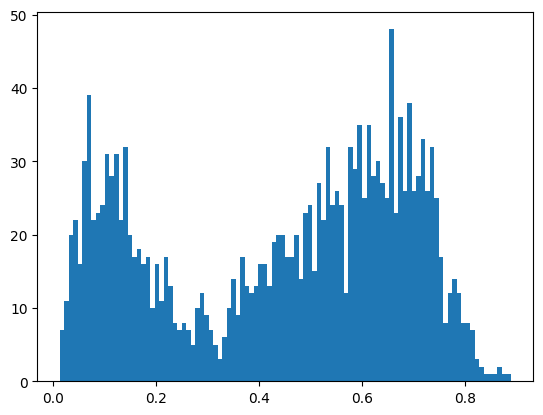

In [46]:
plt.hist(df['iou'].to_numpy(), bins=100)